In [106]:
import pandas as pd
import tabular_data as td

df = pd.read_csv('AirBnbData.csv')
df = td.prepare_data(df)

features, labels = td.load_airbnb(df,"Price_Night")


In [ ]:
df.describe()

In [107]:
from sklearn.model_selection import train_test_split

X = features
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.3)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_validation_pred = model.predict(X_validation)
y_test_pred = model.predict(X_test)



In [108]:
from sklearn.metrics import mean_squared_error

train_loss = mean_squared_error(y_train, y_train_pred)
validation_loss = mean_squared_error(y_validation, y_validation_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(
    f"Train Loss: {train_loss} | Validation Loss: {validation_loss} | Test Loss: {test_loss}"
)

Train Loss: 9929.654331497864 | Validation Loss: 9590.310264367254 | Test Loss: 8851.16074300491


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_Night'>

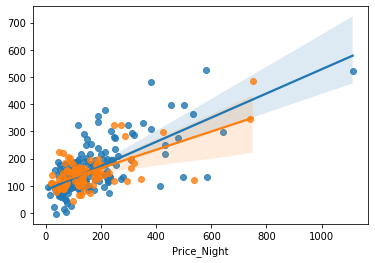

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y_test,y_test_pred)
sns.regplot(y_validation,y_validation_pred)

In [110]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_test_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)

print('Mean square error:',mse)
print('Root mean square error:',rmse)
print('R2 score:',r2)


# Note - these results are poor


Mean square error: 8851.16074300491
Root mean square error: 94.08060768832709
R2 score: 0.4663258447085704


In [111]:
from sklearn.linear_model import SGDRegressor

In [112]:
def tune_regression_model_hyperparameters(model, test_sets, hyperparameter_dict):
    best_rmse = 100000
    best_hyperparameter_values_dict = {}
    performrance_metrics_dict={}

    for i in hyperparameter_dict['loss']:
        for j in hyperparameter_dict['learning_rate']:
            my_model =  model(loss=i,learning_rate=j)
            
            my_model.fit(X_train,y_train)
            y_validation_pred = my_model.predict(X_validation)

            mse = mean_squared_error(y_validation, y_validation_pred)
            rmse = math.sqrt(mse)
            r2 = r2_score(y_validation, y_validation_pred)

            if rmse < best_rmse:
                best_rmse = rmse
                best_hyperparameter_values_dict["loss"] = i
                best_hyperparameter_values_dict["learning_rate"] = j 
                performrance_metrics_dict["mse"] = mse
                performrance_metrics_dict["rmse"] = rmse
                performrance_metrics_dict["r2"] = r2
                best_model = model

    return best_model, best_hyperparameter_values_dict, performrance_metrics_dict


test_sets = [X_train,X_validation, X_test, y_train, y_validation, y_test]
model = SGDRegressor
hyperparameter_dict={
    "loss":['squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],
    "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive']
    }

best_model, best_hyperparameter_values_dict, performrance_metrics_dict = tune_regression_model_hyperparameters(model,test_sets,hyperparameter_dict)
print(best_hyperparameter_values_dict)
print(performrance_metrics_dict)

{'loss': 'epsilon_insensitive', 'learning_rate': 'constant'}
{'mse': 11815.304326185224, 'rmse': 108.6982259569365, 'r2': 0.2585547419533445}
